# 4. Exemple ACP avec noyau

Comparaison de ACP linéaire par rapport à ACP avec noyau.

Code initial : 
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html


In [1]:
print(__doc__)

# Authors: Mathieu Blondel
#          Andreas Mueller
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

Automatically created module for IPython interactive environment


In [2]:
from time import time, strftime, gmtime

# Heure démarrage
t0 = time()

### Génération données et calcul des ACP

In [3]:
np.random.seed(0)

# Création d'un dataset de deux cercles concentriques avec étiquettes
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

# Entrainement des modeles selon liste des noyaux
kernels = ["linear", "cosine", "rbf"]
names = []
models = {}
X_kpcas = {}

for kernel in kernels:
    name = "kpca_" + kernel
    kpca = KernelPCA(kernel=kernel, fit_inverse_transform=True, gamma=10)
    X_kpcas[name] = kpca.fit_transform(X)
    models[name] = kpca
    names.append(name)

In [4]:
# Dimension des données après tranformation
for name in names:
    print("Dimensions espace " + name + " : " + str(X_kpcas[name].shape[1]))

Dimensions espace kpca_linear : 2
Dimensions espace kpca_cosine : 2
Dimensions espace kpca_rbf : 289


Text(0, 0.5, '2nd component')

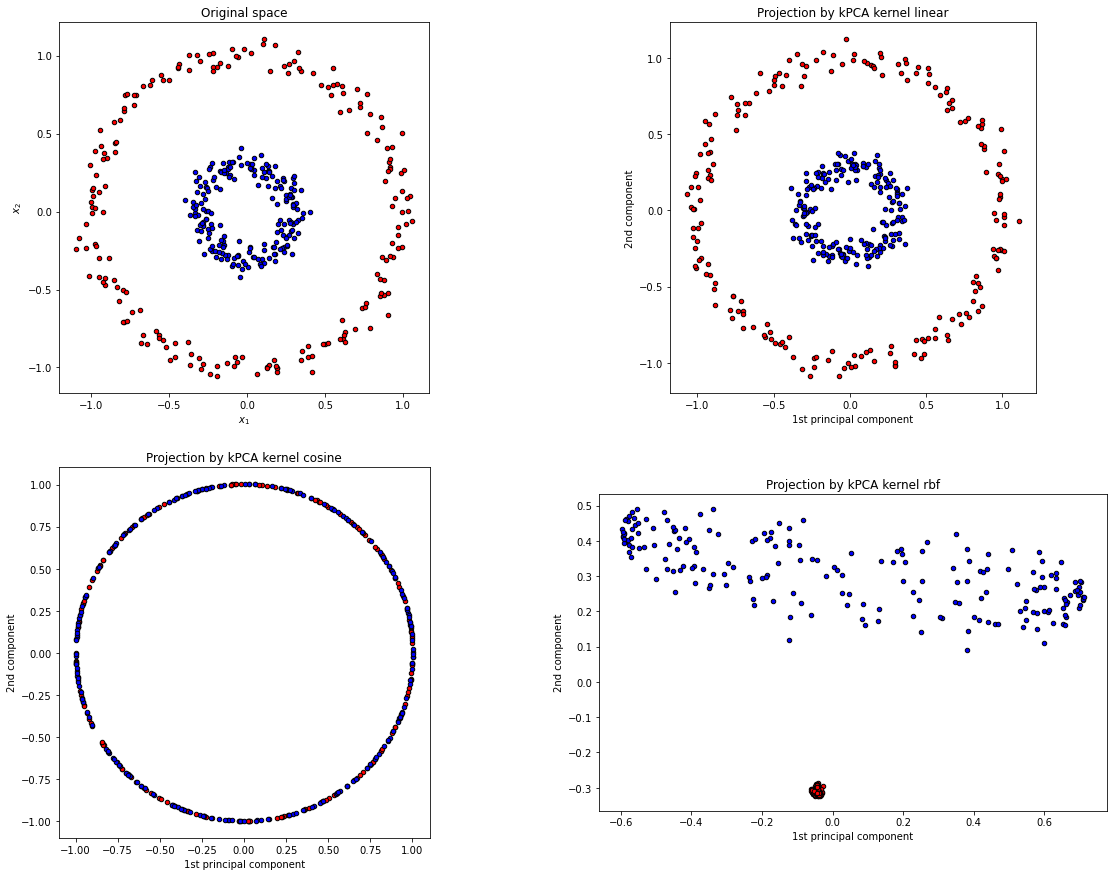

In [5]:
# Plot results
plt.figure(figsize=(20, 15))

reds = y == 0
blues = y == 1

red_params = {"c":"red", "s":20, "edgecolor":"k"}
blue_params = {"c":"blue", "s":20, "edgecolor":"k"}


plt.subplot(2, 2, 1, aspect='equal')
plt.scatter(X[reds, 0], X[reds, 1], **red_params)
plt.scatter(X[blues, 0], X[blues, 1], **blue_params)
plt.title("Original space")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplot(2, 2, 2, aspect='equal')
X_kpca = X_kpcas['kpca_linear']
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], **red_params)
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], **blue_params)
plt.title("Projection by kPCA kernel linear")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
X_kpca = X_kpcas['kpca_cosine']
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], **red_params)
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], **blue_params)
plt.title("Projection by kPCA kernel cosine")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
X_kpca = X_kpcas['kpca_rbf']
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], **red_params)
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], **blue_params)
plt.title("Projection by kPCA kernel rbf")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

In [6]:
t1 = time()
print("computing time : {:8.6f} sec".format(t1-t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1-t0)))

computing time : 1.255754 sec
computing time : 00:00:01
